## Step 1: Reading and Understanding the data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [4]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.shape

(9240, 37)

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Inspection

In [7]:
round((lead.isnull().sum()/len(lead))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Replacing all values that are 'Select' as nan. 
lead = lead.replace('Select', np.nan)

In [10]:
round((lead.isnull().sum()/len(lead))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
lead.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


## Step 2: Data Cleaning

### Dropping the columns with null values > 40%

In [12]:
lead.drop(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1, inplace = True)


In [13]:
round((lead.isnull().sum()/len(lead))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [15]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [16]:
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [17]:
lead.shape

(9240, 30)

In [18]:
lead.nunique() # Total unique values in all columns 

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

#### 'What is your current occupation'

In [19]:
round(lead['What is your current occupation'].value_counts(normalize=True)*100, 2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

In [20]:
## We see that majority are umemployed so , we will replace the nan with 'Unemployed'
lead['What is your current occupation'] = lead['What is your current occupation'].fillna(lead['What is your current occupation'].mode()[0])

In [21]:
round(lead['What is your current occupation'].value_counts(normalize=True)*100, 2)

Unemployed              89.72
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

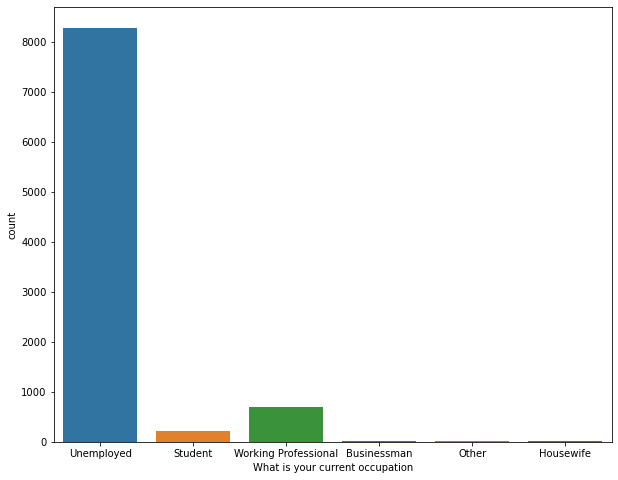

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(lead['What is your current occupation'])
plt.show()

#### Country

In [24]:
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [25]:
lead['Country'] = lead['Country'].fillna('Not given') # replacing the nan's with 'Not given'.

In [26]:
# Here we are defining a function which we will assign every country other than India to another instance that is 'Other country'.
def country_assign(x):
    if x!= 'India' and x!= 'Not given':
        x = 'Other country'
    return x

lead['Country'] = lead.apply(lambda x: country_assign(x['Country']), axis = 1)

In [27]:
lead['Country'].value_counts()

India            6492
Not given        2461
Other country     287
Name: Country, dtype: int64

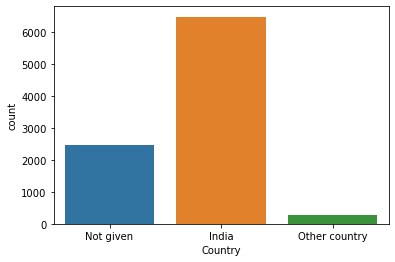

In [28]:
sns.countplot(lead['Country'])
plt.show()

#### What matters most to you in choosing a course

In [29]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
## Data is skewed in the variable 'What matters most to you in choosing a course', so it's better to drop it. 
lead.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

#### Specialization 

In [31]:
lead['Specialization'] = lead['Specialization'].fillna('Not given') # replacing the nan's with 'Not given'

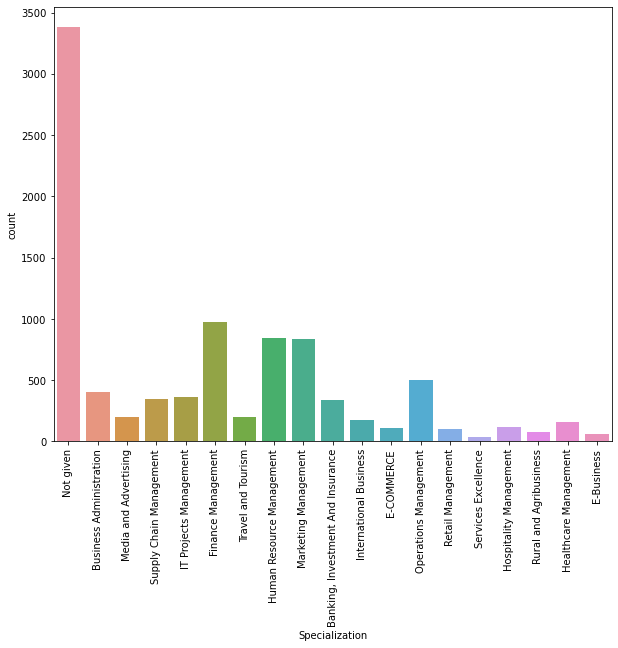

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(x = lead['Specialization'])
plt.xticks(rotation = 90)
plt.show()

#### Tags

In [33]:
## Dropping the variable 'Tags' as it has been generated by the Sales team.
lead.drop('Tags', axis = 1, inplace = True)

#### Lead Source

In [34]:
lead['Lead Source'] = lead['Lead Source'].fillna(lead['Lead Source'].mode()[0]) # replacing the nan with the mode of the variable


#### TotalVisits and Page Views Per Visit

In [35]:
lead[['TotalVisits', 'Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [36]:
lead['TotalVisits'] = lead['TotalVisits'].fillna(lead['TotalVisits'].median()) # replacing the nan's with the median


In [37]:
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median()) # replacing the nan's with the median


#### Last Activity

In [38]:
lead['Last Activity'] = lead['Last Activity'].fillna(lead['Last Activity'].mode()[0]) # replacing the nan's with the mode


#### City

In [39]:
round(lead.City.value_counts(normalize=True)*100,2)

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

In [40]:
lead['City'] = lead['City'].fillna(lead['City'].mode()[0]) # replacing the nan's with the mode

#### Lead Source

In [971]:
round(lead['Lead Source'].value_counts(normalize=True)*100, 2)

Google               31.51
Direct Traffic       27.48
Olark Chat           19.05
Organic Search       12.47
Reference             5.78
Welingak Website      1.54
Referral Sites        1.32
Facebook              0.60
bing                  0.07
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
Pay per Click Ads     0.01
blog                  0.01
WeLearn               0.01
welearnblog_Home      0.01
youtubechannel        0.01
testone               0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [67]:
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')

In [68]:
lead['Lead Source'] = lead['Lead Source'].replace(['bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release', 'Pay per Click Ads', 'blog', 'WeLearn', 'welearnblog_Home', 'youtubechannel', 'testone', 'NC_EDM'], 'Others')


In [69]:
round(lead['Lead Source'].value_counts(normalize=True)*100, 2)

Google              31.51
Direct Traffic      27.48
Olark Chat          19.05
Organic Search      12.47
Reference            5.78
Welingak Website     1.54
Referral Sites       1.32
Facebook             0.60
Others               0.25
Name: Lead Source, dtype: float64

In [41]:
# checking for null values one more time

In [42]:
round((lead.isnull().sum()/len(lead))*100, 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [43]:
lead.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True) # dropping the columns 'Prospect ID' and 'Lead Number'


In [44]:
lead.shape

(9240, 26)

In [45]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Country                                   9240 non-null   object 
 10  Specialization                      

## Step 3 - EDA 

### Visualization of Categorical Variables 

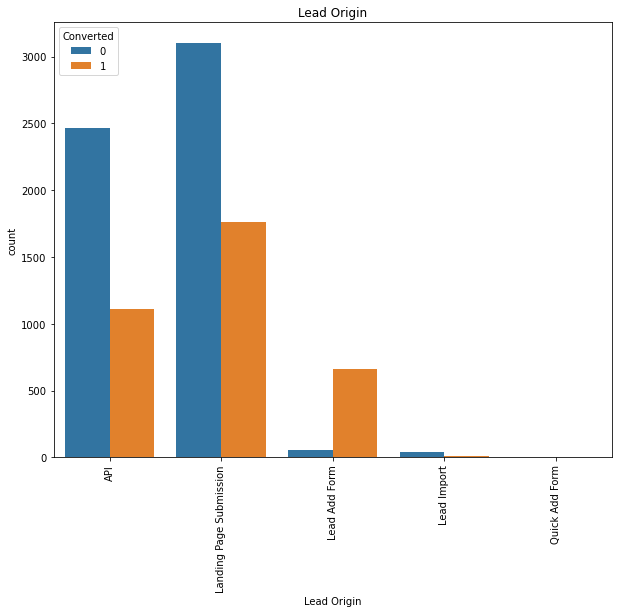

None


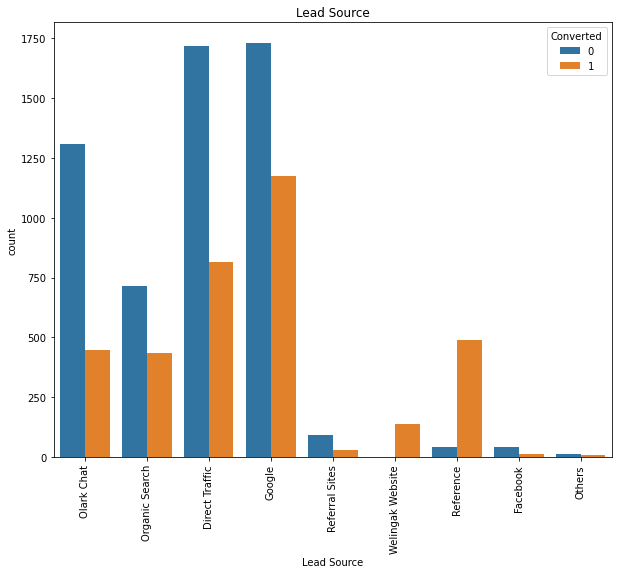

None


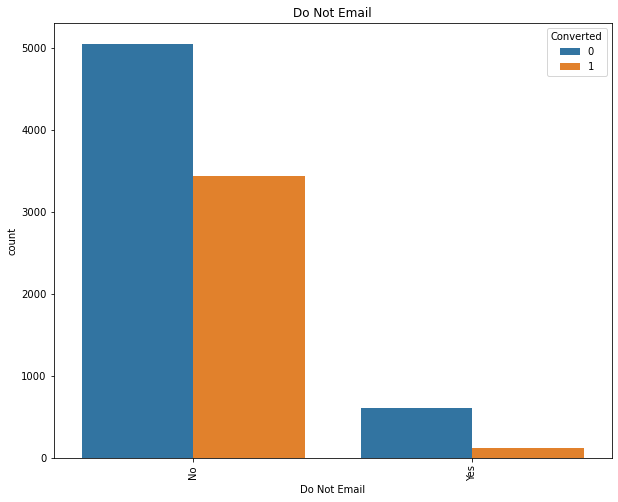

None


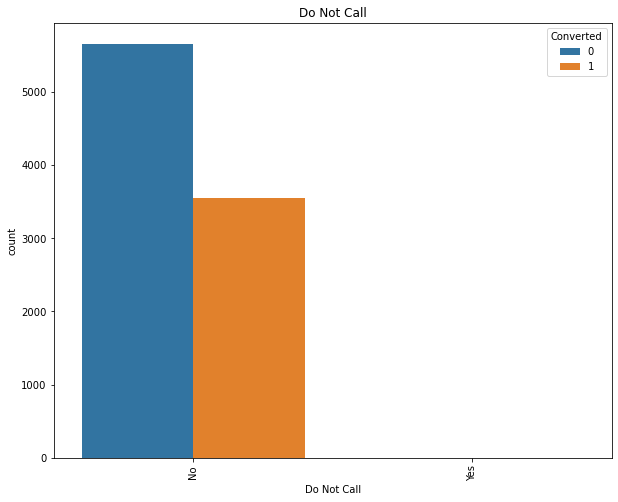

None


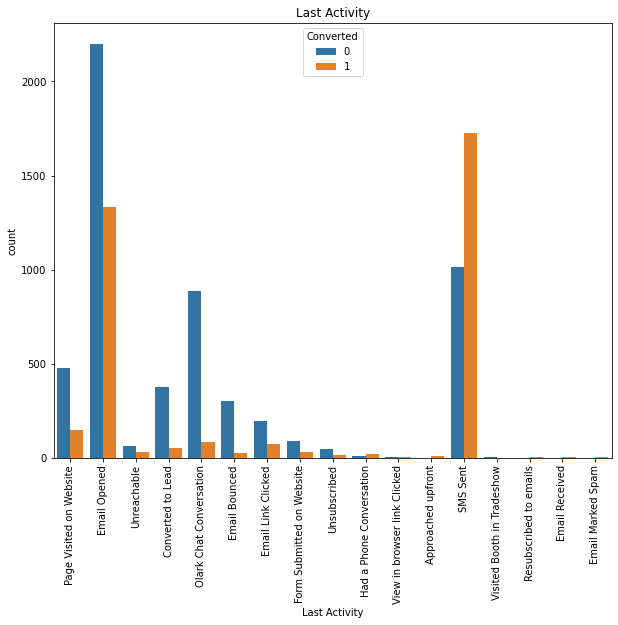

None


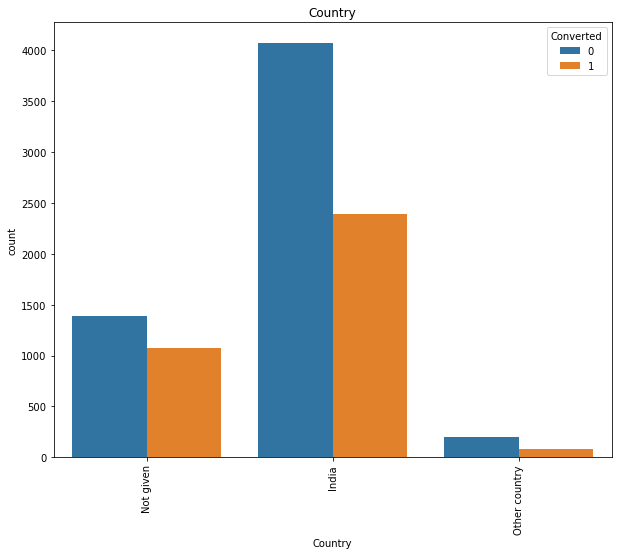

None


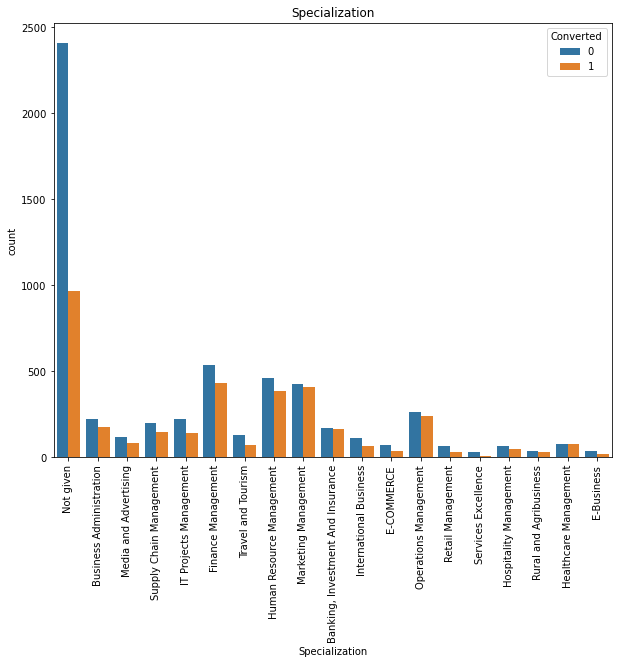

None


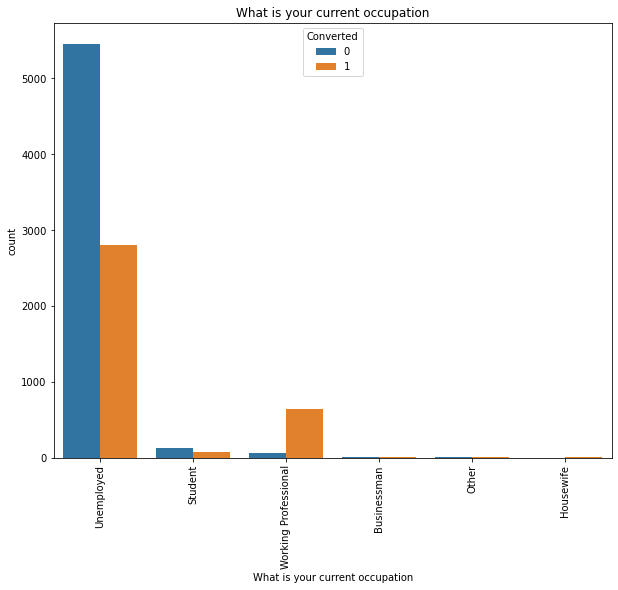

None


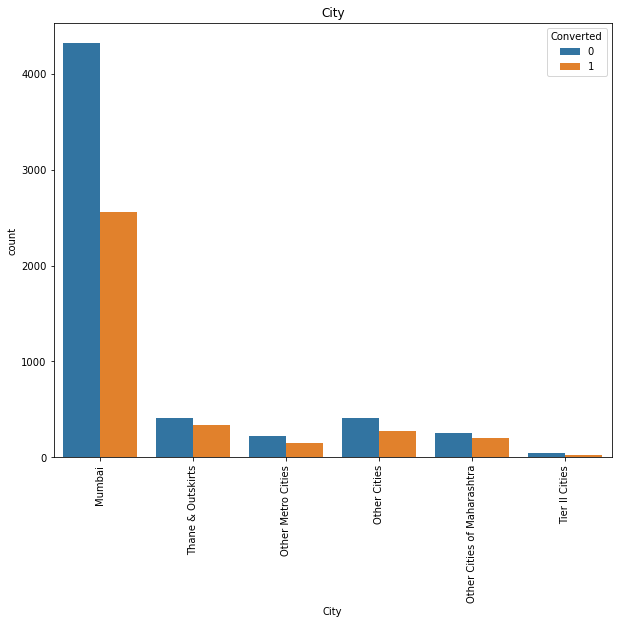

None


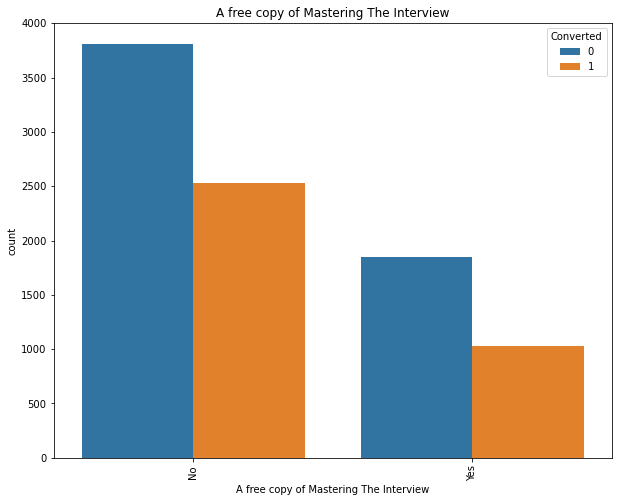

None


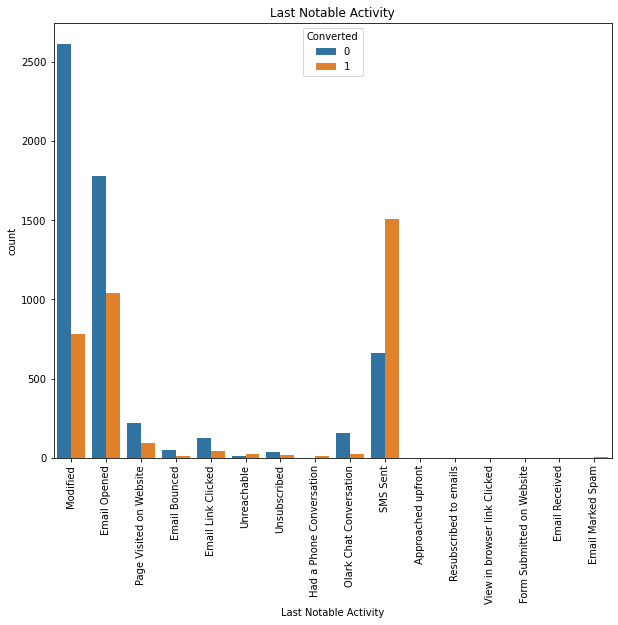

None


In [70]:
for col in lead.columns:
    
    if lead[col].dtype == 'O':
        plt.figure(figsize=(10,8))
        sns.countplot(col, hue = 'Converted', data = lead)
        plt.title(col)
        plt.xticks(rotation = 90)
        
        print(plt.show())

- We see that majority of the lead is originating from API, Landing Page Submission. 
- Major Lead source contributing factors are Google, Direct Traffic, Clark Chat, organic search and through references as well. These sources together contribute for approximately 96% of all the lead generation. We see a higher conversion rate from references and Welingtak website as well. 
- Factors like Do not email, do not call doesn’t show any pattern. 
- We see a high lead base originating from India.
- Traffic search for specializations such as Finance Management, Human Resource Management, Marketing Management  and Operations Management are slightly higher from others. Though we see a similar pattern for most of the specialisations. 
  Unemployed professionals are the largest customer base which is followed by Working professionals.
- Mumbai is contributing to largest traffic, approximately 58%


#### Dropping the variables where there is data imbalance and all the instances are explained by only one class. 

In [47]:
lead.drop(['Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)


### Visualization of Numerical Variables 

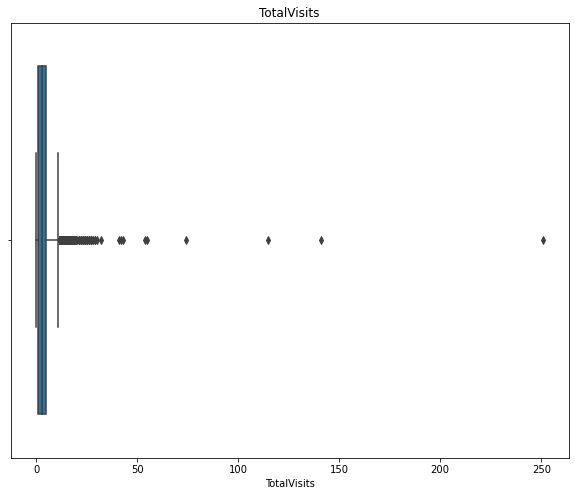

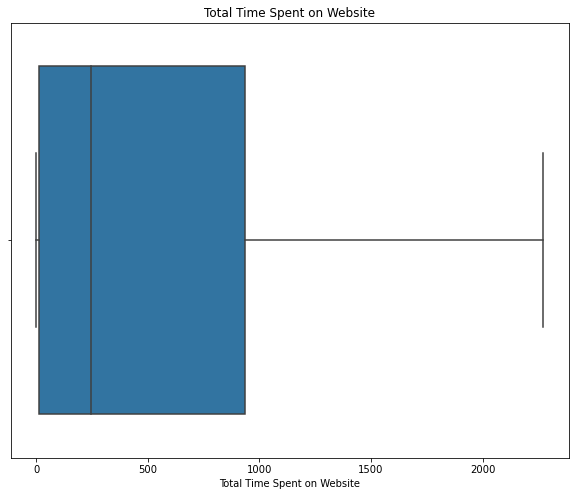

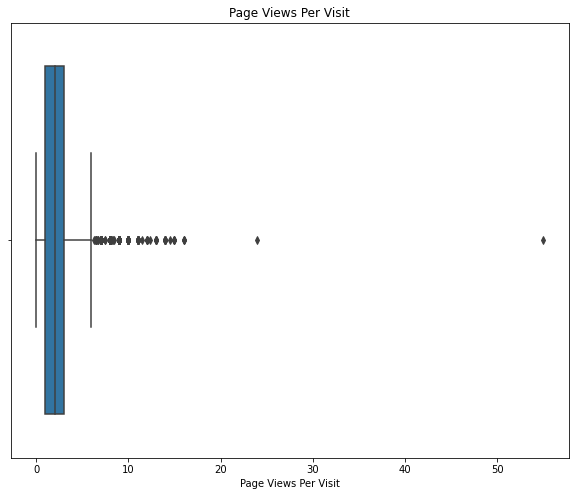

In [48]:
for col in lead.columns:
    
    if lead[col].dtype != 'O' and col!= 'Converted':
        plt.figure(figsize=(10,8))
        sns.boxplot(lead[col])
        plt.title(col)
        #plt.xticks(rotation = 90)
        
        plt.show()

### Visualization of Target Variable 

In [57]:
round(lead.Converted.value_counts(normalize=True)*100, 2)

0    61.46
1    38.54
Name: Converted, dtype: float64

<AxesSubplot:>

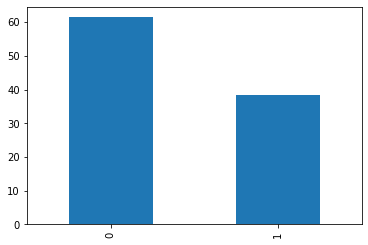

In [58]:
round(lead.Converted.value_counts(normalize=True)*100, 2).plot(kind = 'bar', )


- The conversion rate is 38.54%

#### Outlier Treatment of Continuous Variables

In [59]:
lead[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].quantile([0, 0.05, 0.25, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0.00,0.0,0.00,0.0
0.05,0.0,0.00,0.0
0.25,1.0,12.00,1.0
0.50,3.0,248.00,2.0
0.60,3.0,372.00,2.5
0.70,4.0,715.00,3.0
0.80,5.0,1087.20,4.0
0.90,7.0,1380.00,5.0
0.95,10.0,1562.00,6.0
0.99,17.0,1840.61,9.0


After checking the percentiles for the variables 'TotalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit', we find the the variables 'TotalVisits' and 'Page Views Per Visit' require outlier treatment


In [60]:
Q1 = lead['TotalVisits'].quantile(0.05)
Q3 = lead['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead['TotalVisits'] >= Q1 - 1.5*IQR) & (lead['TotalVisits'] <= Q3 + 1.5*IQR)]

In [61]:
Q1 = lead['Page Views Per Visit'].quantile(0.05)
Q3 = lead['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

In [62]:
lead[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].quantile([0, 0.05, 0.25, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0.00,0.0,0.00,0.0
0.05,0.0,0.00,0.0
0.25,1.0,11.00,1.0
0.50,3.0,248.00,2.0
0.60,3.0,372.80,2.5
0.70,4.0,717.00,3.0
0.80,5.0,1087.40,4.0
0.90,7.0,1380.00,5.0
0.95,9.0,1562.00,6.0
0.99,16.0,1840.87,9.0


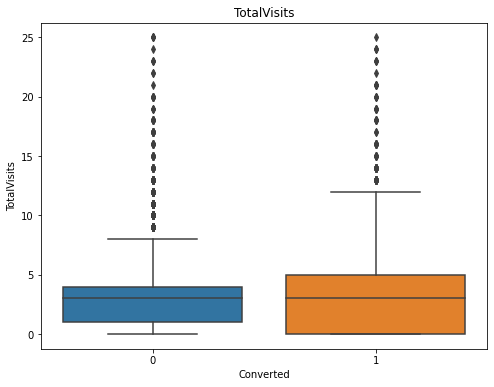

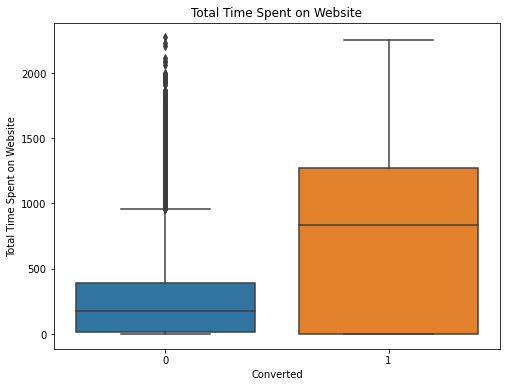

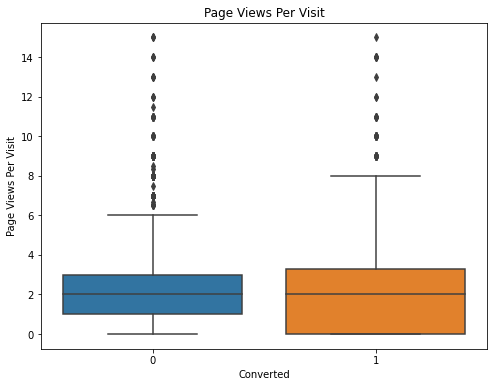

In [64]:
for col in lead.columns:
    
    if lead[col].dtype != 'O' and col!= 'Converted':
        plt.figure(figsize=(8,6))
        sns.boxplot(y = lead[col], x= lead['Converted'])
        plt.title(col)
        #plt.xticks(rotation = 90)
        
        plt.show()

- People who have spent more time on the website have converted for a program.

In [71]:
lead.shape

(9214, 15)

In [72]:
lead.tail(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
9230,Landing Page Submission,Google,No,No,0,2.0,870,2.00,Email Opened,India,Human Resource Management,Unemployed,Mumbai,No,Email Opened
9231,Landing Page Submission,Google,No,No,1,8.0,1016,4.00,Email Opened,India,"Banking, Investment And Insurance",Unemployed,Mumbai,No,Email Opened
9232,Landing Page Submission,Direct Traffic,No,No,0,2.0,1770,2.00,SMS Sent,India,Human Resource Management,Unemployed,Mumbai,Yes,SMS Sent
9233,API,Direct Traffic,No,No,1,13.0,1409,2.60,SMS Sent,India,Not given,Unemployed,Mumbai,No,SMS Sent
9234,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.50,SMS Sent,India,Business Administration,Unemployed,Mumbai,No,Modified
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Other country,IT Projects Management,Unemployed,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,Other Metro Cities,No,SMS Sent
9239,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Other country,Supply Chain Management,Unemployed,Other Cities,Yes,Modified


In [73]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9214 non-null   object 
 1   Lead Source                             9214 non-null   object 
 2   Do Not Email                            9214 non-null   object 
 3   Do Not Call                             9214 non-null   object 
 4   Converted                               9214 non-null   int64  
 5   TotalVisits                             9214 non-null   float64
 6   Total Time Spent on Website             9214 non-null   int64  
 7   Page Views Per Visit                    9214 non-null   float64
 8   Last Activity                           9214 non-null   object 
 9   Country                                 9214 non-null   object 
 10  Specialization                          9214 non-null   obje

In [74]:
for var in lead.columns:
    if lead[var].dtype == 'O':
        print(var)
    
        print(round(lead[var].value_counts(normalize=True)*100, 2))
    
        print('-----------------------')

Lead Origin
Landing Page Submission    52.81
API                        38.80
Lead Add Form               7.78
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
-----------------------
Lead Source
Google              31.51
Direct Traffic      27.48
Olark Chat          19.05
Organic Search      12.47
Reference            5.78
Welingak Website     1.54
Referral Sites       1.32
Facebook             0.60
Others               0.25
Name: Lead Source, dtype: float64
-----------------------
Do Not Email
No     92.14
Yes     7.86
Name: Do Not Email, dtype: float64
-----------------------
Do Not Call
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64
-----------------------
Last Activity
Email Opened                    38.35
SMS Sent                        29.76
Olark Chat Conversation         10.55
Page Visited on Website          6.78
Converted to Lead                4.65
Email Bounced                    3.54
Email Link Clicked       

In [ ]:
# dropping the column 'Last Activity' as it has high correlations with 'Last Notable Activity'

In [75]:
lead.drop('Last Activity', axis = 1, inplace=True)

## Step 4: Data Preprocessing

1. Converting Yes/No
2. Dummy encoding categorical variables with more than two classes 

In [76]:
## converting columns with Yes and No to 1 and 0

var_list = ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

lead[var_list] = lead[var_list].apply(lambda x: x.map({'Yes':1, 'No':0}))
lead[var_list].head()

,Do Not Email,Do Not Call,A free copy of Mastering The Interview
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [77]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Not given,Not given,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,India,Not given,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Not given,Unemployed,Mumbai,0,Modified


In [78]:
categorical_var = ['City','Lead Origin', 'Lead Source', 'Country', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']

status = pd.get_dummies(lead[categorical_var], drop_first=True)


In [79]:
status.head()

,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Not given,Country_Other country,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not given,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [80]:
lead_new = pd.concat([lead, status], axis = 1)

In [81]:
lead_new.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Not given,Country_Other country,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not given,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Not given,Not given,Unemployed,Mumbai,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,India,Not given,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Not given,Unemployed,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [82]:
lead_new.drop(categorical_var, axis = 1, inplace = True)

In [83]:
pd.set_option('display.max_columns', 100)

In [84]:
lead_new.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Not given,Country_Other country,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not given,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [85]:
lead_new.shape

(9214, 63)

### Train Test Split and Scaling the variables 

In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [87]:
lead_train, lead_test = train_test_split(lead_new, train_size=0.7, random_state=100)
lead_train.shape

(6449, 63)

In [88]:
lead_test.shape

(2765, 63)

In [89]:
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = MinMaxScaler()

lead_train[num_var] = scaler.fit_transform(lead_train[num_var])
lead_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Not given,Country_Other country,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not given,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2178,0,0,0,0.20,0.041373,0.333333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2924,0,0,1,0.12,0.229313,0.133333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9108,0,0,0,0.16,0.864877,0.266667,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7926,0,0,0,0.16,0.102553,0.088667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7870,0,0,0,0.24,0.102993,0.400000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [90]:
lead_train.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Not given,Country_Other country,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not given,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.0,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000
mean,0.078152,0.000310,0.392309,0.132343,0.215263,0.155700,0.073500,0.048069,0.042487,0.079547,0.007908,0.530625,0.079392,0.004962,0.0,0.005117,0.310746,0.191503,0.124205,0.002326,0.060009,0.012870,0.014886,0.269344,0.030392,0.042177,0.006203,0.013180,0.102962,0.017367,0.013025,0.095209,0.037990,0.019228,0.090712,0.021554,0.363777,0.054737,0.010234,0.008373,0.004497,0.039851,0.020933,0.001396,0.001241,0.022019,0.894247,0.080167,0.006358,0.019073,0.000310,0.302217,0.000155,0.000155,0.001706,0.371220,0.020003,0.032718,0.000155,0.237246,0.003566,0.004807,0.000155
std,0.268431,0.017609,0.488303,0.129970,0.243046,0.135904,0.260975,0.213930,0.201714,0.270612,0.088583,0.499100,0.270371,0.070272,0.0,0.071356,0.462835,0.393514,0.329841,0.048176,0.237522,0.112723,0.121106,0.443653,0.171678,0.201009,0.078517,0.114055,0.303932,0.130645,0.113391,0.293526,0.191188,0.137335,0.287221,0.145232,0.481123,0.227484,0.100653,0.091129,0.066913,0.195625,0.143173,0.037334,0.035202,0.146756,0.307545,0.271573,0.079487,0.136791,0.017609,0.459255,0.012452,0.012452,0.041268,0.483169,0.140021,0.177912,0.012452,0.425427,0.059618,0.069171,0.012452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

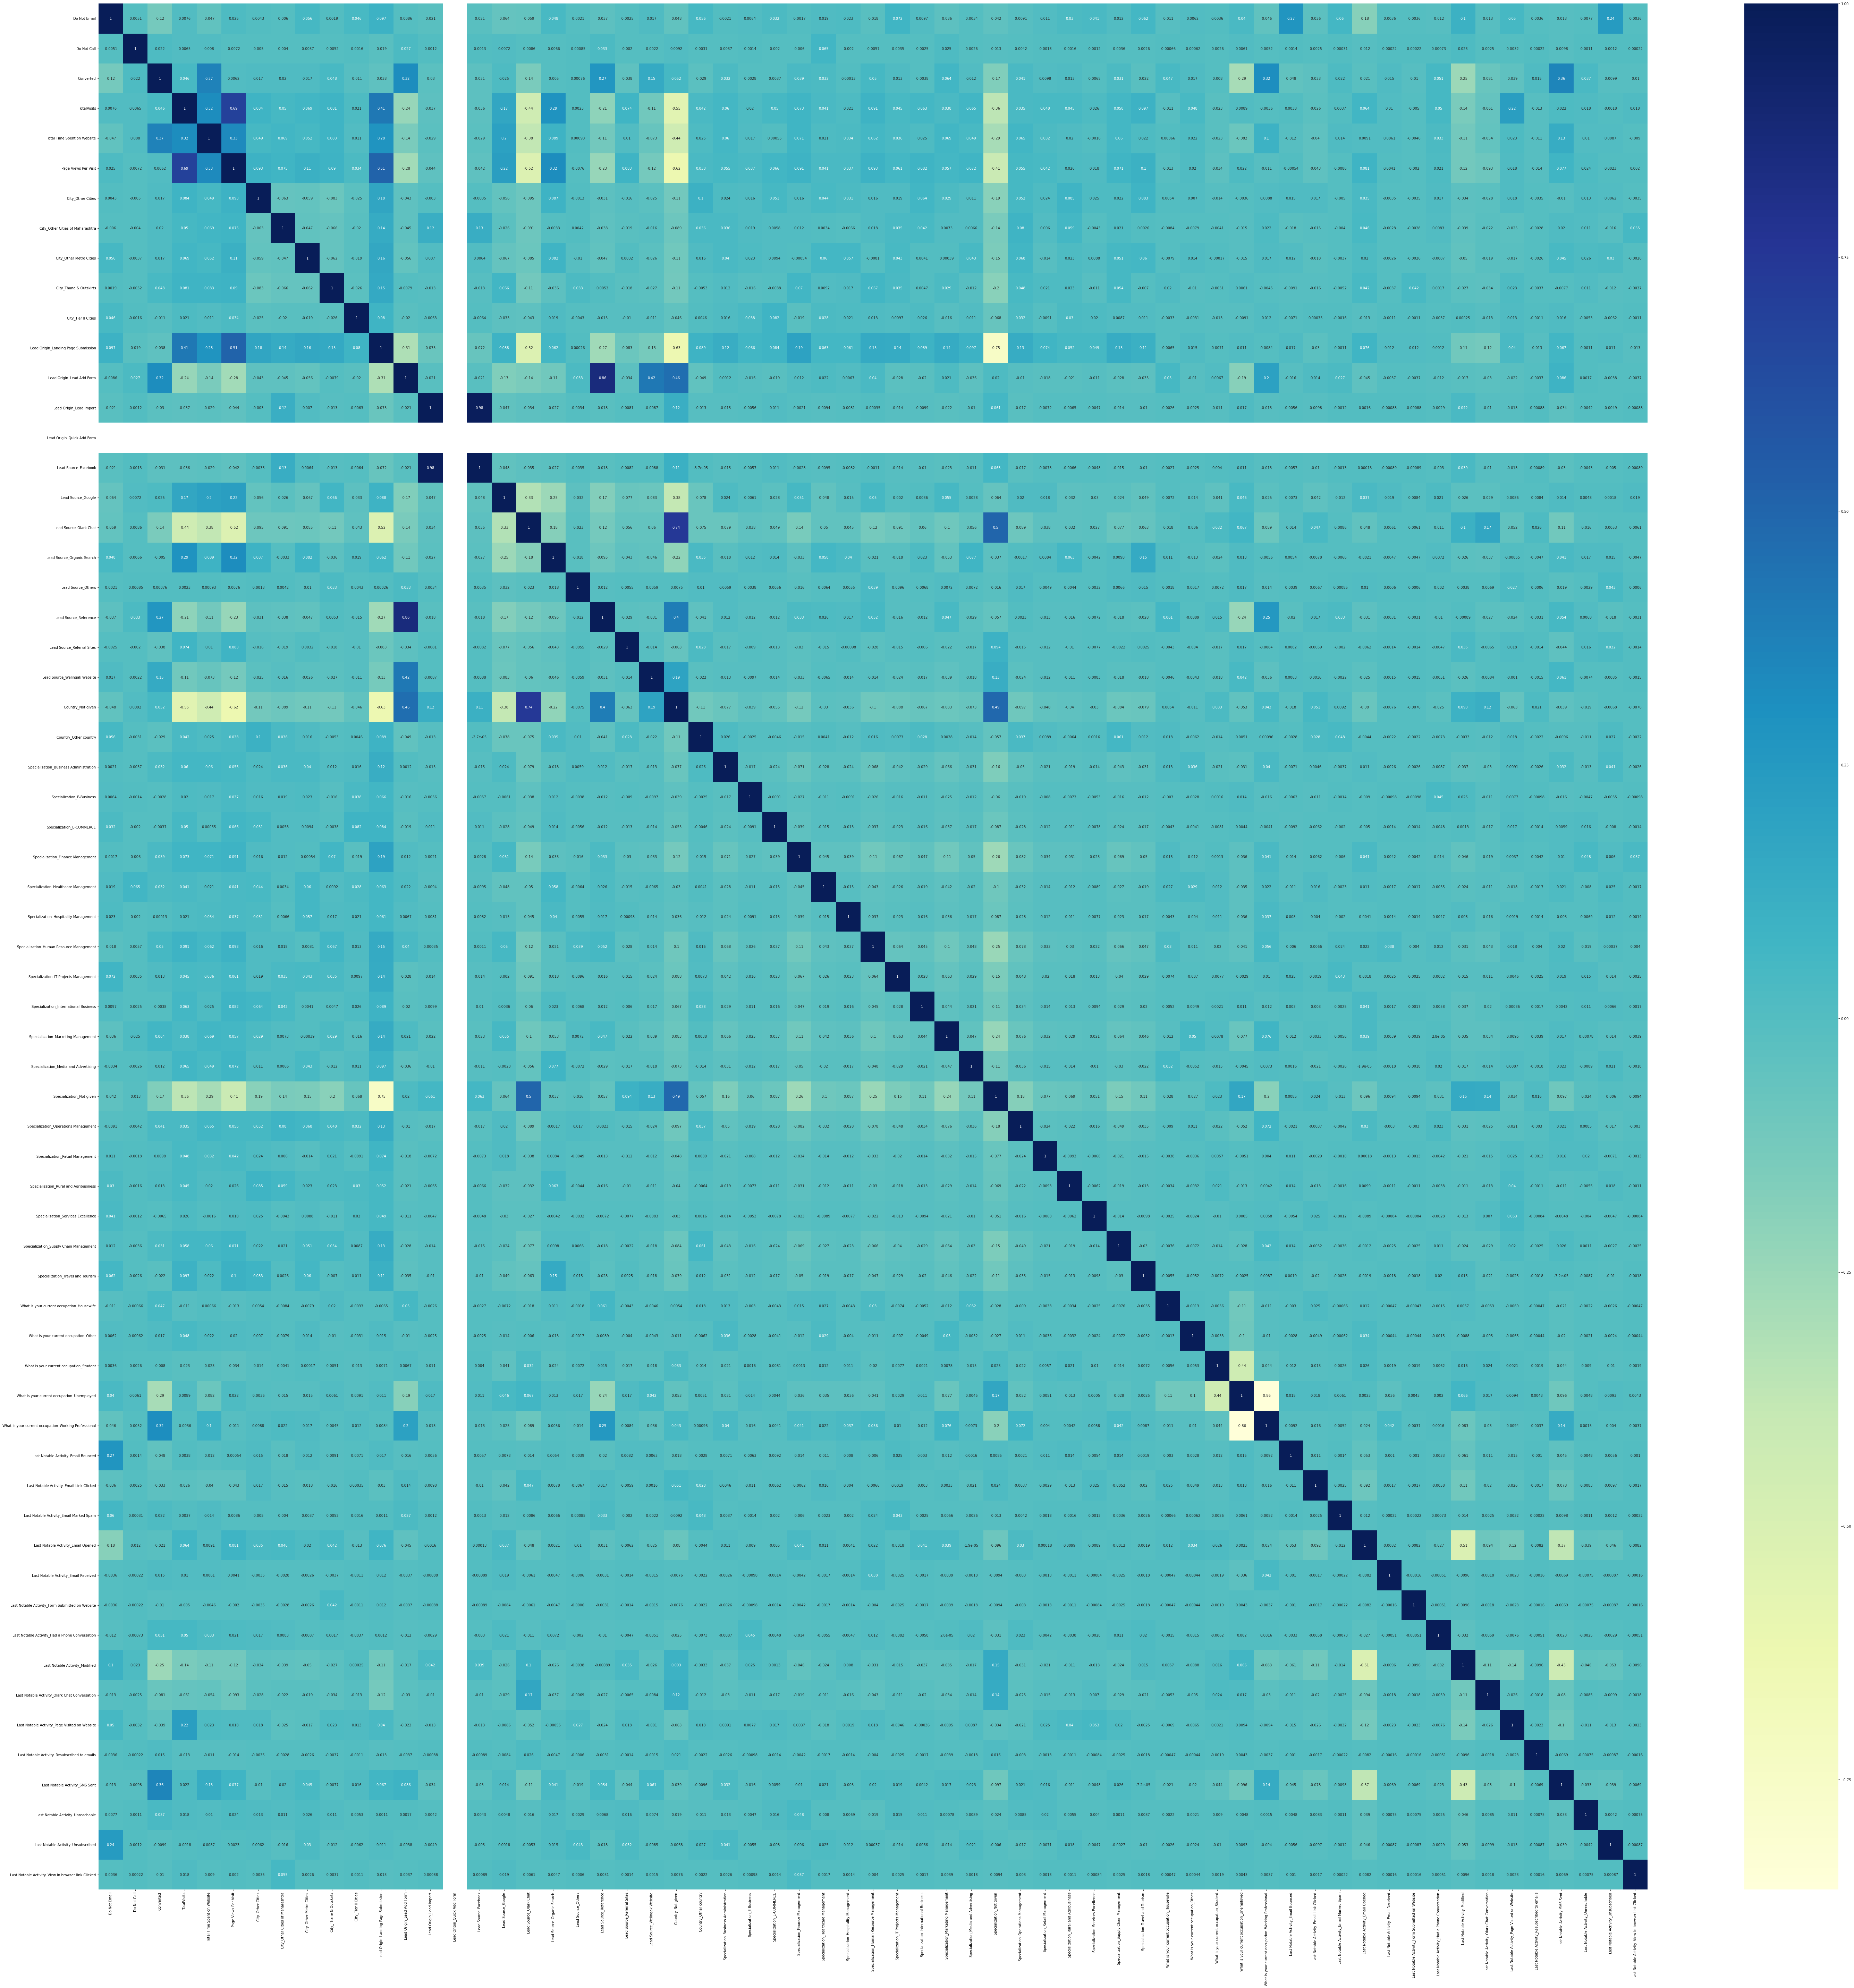

In [91]:
plt.figure(figsize=(100,100))
sns.heatmap(lead_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### Creating X_train and y_train

In [92]:
y_train = lead_train.pop('Converted')
X_train = lead_train

In [93]:
X_train.shape, y_train.shape

((6449, 62), (6449,))

## Step 5 - Building a model

In [94]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rfe = RFE(logreg, 20)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('City_Other Cities', False, 21),
 ('City_Other Cities of Maharashtra', False, 41),
 ('City_Other Metro Cities', False, 28),
 ('City_Thane & Outskirts', False, 17),
 ('City_Tier II Cities', False, 13),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Origin_Quick Add Form', False, 43),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', False, 27),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', False, 40),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_Not given', True, 1),
 ('Country_Other country', False, 33),
 ('Specialization_Business Administration', False, 35),
 ('Special

In [97]:
col = X_train.columns[rfe.support_]

In [98]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Country_Other country',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Man

In [99]:
X_train_rfe = X_train[col]

#### Model 1

In [100]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial())
lr_model_1 = lr.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.9
Date:                Wed, 28 Dec 2022   Deviance:                       5363.7
Time:                        20:46:18   Pearson chi2:                 7.59e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2638      0.686     -0.385      0.700      -1.608       1.080
Do Not Email                                            -1.3702      0.170     -8.058      0.000      -1.703      -1.037
TotalVisits                                              1.6535      0.357      4.631      0.000       0.954       2.353
Total Time Spent on Website                              4.5592      0.166     27.541      0.000       4.235       4.884
Page Views Per Visit                                    -1.0409      0.378     -2.756      0.006      -1.781      -0.301
Lead Origin_Landing Page Submission                     -1.0111      0.124     -8.142      0.000      -1.255      -0.768
Lead Origin_Lead Add Form                                2.3317      0.203     11.479      0.000       1.934       2.730
Lead Source_Facebook                                    -1.0752      0.528     -2.036      0.042      -2.110      -0.040
Lead Source_Welingak Website                             3.4427      1.032      3.336      0.001       1.420       5.466
Country_Not given                                        1.0368      0.129      8.023      0.000       0.783       1.290
Specialization_Not given                                -1.2239      0.123     -9.926      0.000      -1.466      -0.982
What is your current occupation_Housewife               22.7132   2.18e+04      0.001      0.999   -4.27e+04    4.27e+04
What is your current occupation_Student                 -0.8653      0.708     -1.223      0.221      -2.252       0.522
What is your current occupation_Unemployed              -1.3013      0.672     -1.938      0.053      -2.618       0.015
What is your current occupation_Working Professional     1.2133      0.695      1.746      0.081      -0.149       2.575
Last Notable Activity_Had a Phone Conversation          24.0356   1.95e+04      0.001      0.999   -3.82e+04    3.83e+04
Last Notable Activity_Olark Chat Conversation           -1.3104      0.353     -3.708      0.000      -2.003      -0.618
Last Notable Activity_Resubscribed to emails            25.3183   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_SMS Sent                           1.8302      0.080     22.806      0.000       1.673       1.987
Last Notable Activity_Unreachable                        2.0458      0.531      3.849      0.000       1.004       3.087
Last Notable Activity_Unsubscribed                       1.3317      0.499      2.666      0.008       0.353       2.311
========================================================================================================================
"""

In [101]:
## calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,481.08
13,What is your current occupation_Unemployed,44.00
14,What is your current occupation_Working Profes...,35.20
12,What is your current occupation_Student,10.98
5,Lead Origin_Landing Page Submission,3.34
10,Specialization_Not given,2.98
9,Country_Not given,2.70
4,Page Views Per Visit,2.38
2,TotalVisits,2.04
6,Lead Origin_Lead Add Form,1.87


#### Model 2

In [102]:
X = X_train_rfe.drop('Last Notable Activity_Resubscribed to emails', axis = 1)

X_train_sm = sm.add_constant(X)
lr = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
lr_model_2 = lr.fit()

lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.8
Date:                Wed, 28 Dec 2022   Deviance:                       5367.5
Time:                        20:46:43   Pearson chi2:                 7.59e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2646      0.686     -0.386      0.700      -1.609       1.079
Do Not Email                                            -1.3707      0.170     -8.062      0.000      -1.704      -1.037
TotalVisits                                              1.6528      0.357      4.630      0.000       0.953       2.352
Total Time Spent on Website                              4.5584      0.166     27.540      0.000       4.234       4.883
Page Views Per Visit                                    -1.0411      0.378     -2.757      0.006      -1.781      -0.301
Lead Origin_Landing Page Submission                     -1.0100      0.124     -8.135      0.000      -1.253      -0.767
Lead Origin_Lead Add Form                                2.3272      0.203     11.460      0.000       1.929       2.725
Lead Source_Facebook                                    -1.0800      0.528     -2.045      0.041      -2.115      -0.045
Lead Source_Welingak Website                             3.4420      1.032      3.335      0.001       1.419       5.465
Country_Not given                                        1.0411      0.129      8.061      0.000       0.788       1.294
Specialization_Not given                                -1.2223      0.123     -9.915      0.000      -1.464      -0.981
What is your current occupation_Housewife               22.7134   2.18e+04      0.001      0.999   -4.27e+04    4.27e+04
What is your current occupation_Student                 -0.8666      0.708     -1.225      0.221      -2.253       0.520
What is your current occupation_Unemployed              -1.3007      0.672     -1.937      0.053      -2.617       0.016
What is your current occupation_Working Professional     1.2133      0.695      1.746      0.081      -0.149       2.575
Last Notable Activity_Had a Phone Conversation          24.0354   1.95e+04      0.001      0.999   -3.82e+04    3.83e+04
Last Notable Activity_Olark Chat Conversation           -1.3131      0.353     -3.717      0.000      -2.005      -0.621
Last Notable Activity_SMS Sent                           1.8288      0.080     22.794      0.000       1.672       1.986
Last Notable Activity_Unreachable                        2.0451      0.531      3.848      0.000       1.003       3.087
Last Notable Activity_Unsubscribed                       1.3311      0.499      2.665      0.008       0.352       2.310
========================================================================================================================
"""

In [103]:
## calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,481.08
13,What is your current occupation_Unemployed,44.00
14,What is your current occupation_Working Profes...,35.20
12,What is your current occupation_Student,10.98
5,Lead Origin_Landing Page Submission,3.34
10,Specialization_Not given,2.98
9,Country_Not given,2.70
4,Page Views Per Visit,2.38
2,TotalVisits,2.04
6,Lead Origin_Lead Add Form,1.87


#### Model 3

In [104]:
X = X.drop('What is your current occupation_Housewife', axis = 1)

X_train_sm = sm.add_constant(X)
lr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lr_model_3 = lr.fit()

lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.3
Date:                Wed, 28 Dec 2022   Deviance:                       5372.6
Time:                        20:47:00   Pearson chi2:                 7.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4957      0.629      0.788      0.431      -0.737       1.729
Do Not Email                                            -1.3748      0.170     -8.075      0.000      -1.708      -1.041
TotalVisits                                              1.6304      0.357      4.566      0.000       0.931       2.330
Total Time Spent on Website                              4.5533      0.165     27.519      0.000       4.229       4.878
Page Views Per Visit                                    -1.0509      0.378     -2.780      0.005      -1.792      -0.310
Lead Origin_Landing Page Submission                     -1.0065      0.124     -8.109      0.000      -1.250      -0.763
Lead Origin_Lead Add Form                                2.3314      0.203     11.485      0.000       1.934       2.729
Lead Source_Facebook                                    -1.0762      0.528     -2.039      0.041      -2.111      -0.042
Lead Source_Welingak Website                             3.4396      1.032      3.333      0.001       1.417       5.462
Country_Not given                                        1.0347      0.129      8.017      0.000       0.782       1.288
Specialization_Not given                                -1.2218      0.123     -9.913      0.000      -1.463      -0.980
What is your current occupation_Student                 -1.6216      0.654     -2.479      0.013      -2.904      -0.339
What is your current occupation_Unemployed              -2.0553      0.615     -3.340      0.001      -3.261      -0.849
What is your current occupation_Working Professional     0.4577      0.640      0.715      0.475      -0.797       1.713
Last Notable Activity_Had a Phone Conversation          23.0383   1.18e+04      0.002      0.998   -2.32e+04    2.32e+04
Last Notable Activity_Olark Chat Conversation           -1.3113      0.353     -3.713      0.000      -2.003      -0.619
Last Notable Activity_SMS Sent                           1.8284      0.080     22.794      0.000       1.671       1.986
Last Notable Activity_Unreachable                        2.0414      0.532      3.836      0.000       0.998       3.084
Last Notable Activity_Unsubscribed                       1.3347      0.499      2.673      0.008       0.356       2.313
========================================================================================================================
"""

In [105]:
## calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,296.76
12,What is your current occupation_Unemployed,26.85
13,What is your current occupation_Working Profes...,21.73
11,What is your current occupation_Student,7.07
5,Lead Origin_Landing Page Submission,3.34
10,Specialization_Not given,2.98
9,Country_Not given,2.70
4,Page Views Per Visit,2.38
2,TotalVisits,2.04
6,Lead Origin_Lead Add Form,1.87


#### Model 4

In [106]:
X = X.drop('Last Notable Activity_Had a Phone Conversation', axis = 1)

X_train_sm = sm.add_constant(X)
lr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lr_model_4 = lr.fit()

lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.2
Date:                Wed, 28 Dec 2022   Deviance:                       5392.5
Time:                        20:47:11   Pearson chi2:                 7.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4926      0.629      0.783      0.434      -0.741       1.726
Do Not Email                                            -1.3802      0.170     -8.114      0.000      -1.714      -1.047
TotalVisits                                              1.7093      0.354      4.824      0.000       1.015       2.404
Total Time Spent on Website                              4.5424      0.165     27.524      0.000       4.219       4.866
Page Views Per Visit                                    -1.0606      0.377     -2.815      0.005      -1.799      -0.322
Lead Origin_Landing Page Submission                     -1.0163      0.124     -8.219      0.000      -1.259      -0.774
Lead Origin_Lead Add Form                                2.3268      0.203     11.465      0.000       1.929       2.725
Lead Source_Facebook                                    -1.0816      0.528     -2.050      0.040      -2.116      -0.047
Lead Source_Welingak Website                             3.4463      1.032      3.339      0.001       1.423       5.469
Country_Not given                                        1.0361      0.129      8.035      0.000       0.783       1.289
Specialization_Not given                                -1.2353      0.123    -10.048      0.000      -1.476      -0.994
What is your current occupation_Student                 -1.6129      0.654     -2.465      0.014      -2.896      -0.330
What is your current occupation_Unemployed              -2.0395      0.615     -3.314      0.001      -3.246      -0.833
What is your current occupation_Working Professional     0.4644      0.641      0.725      0.468      -0.791       1.720
Last Notable Activity_Olark Chat Conversation           -1.3175      0.353     -3.729      0.000      -2.010      -0.625
Last Notable Activity_SMS Sent                           1.8197      0.080     22.709      0.000       1.663       1.977
Last Notable Activity_Unreachable                        2.0265      0.532      3.808      0.000       0.983       3.070
Last Notable Activity_Unsubscribed                       1.3319      0.499      2.668      0.008       0.354       2.310
========================================================================================================================
"""

In [107]:
## calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,296.76
12,What is your current occupation_Unemployed,26.85
13,What is your current occupation_Working Profes...,21.73
11,What is your current occupation_Student,7.07
5,Lead Origin_Landing Page Submission,3.33
10,Specialization_Not given,2.97
9,Country_Not given,2.70
4,Page Views Per Visit,2.38
2,TotalVisits,2.04
6,Lead Origin_Lead Add Form,1.87


#### Model 5

In [108]:
X = X.drop('What is your current occupation_Working Professional', axis = 1)

X_train_sm = sm.add_constant(X)
lr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lr_model_5 = lr.fit()

lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.5
Date:                Wed, 28 Dec 2022   Deviance:                       5393.0
Time:                        20:47:27   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.9242      0.217      4.265      0.000       0.499       1.349
Do Not Email                                     -1.3805      0.170     -8.113      0.000      -1.714      -1.047
TotalVisits                                       1.7024      0.354      4.804      0.000       1.008       2.397
Total Time Spent on Website                       4.5421      0.165     27.522      0.000       4.219       4.866
Page Views Per Visit                             -1.0591      0.377     -2.810      0.005      -1.798      -0.320
Lead Origin_Landing Page Submission              -1.0170      0.124     -8.224      0.000      -1.259      -0.775
Lead Origin_Lead Add Form                         2.3260      0.203     11.460      0.000       1.928       2.724
Lead Source_Facebook                             -1.0797      0.527     -2.048      0.041      -2.113      -0.046
Lead Source_Welingak Website                      3.4468      1.032      3.340      0.001       1.424       5.470
Country_Not given                                 1.0359      0.129      8.034      0.000       0.783       1.289
Specialization_Not given                         -1.2364      0.123    -10.056      0.000      -1.477      -0.995
What is your current occupation_Student          -2.0431      0.286     -7.146      0.000      -2.603      -1.483
What is your current occupation_Unemployed       -2.4699      0.179    -13.774      0.000      -2.821      -2.118
Last Notable Activity_Olark Chat Conversation    -1.3163      0.353     -3.728      0.000      -2.008      -0.624
Last Notable Activity_SMS Sent                    1.8208      0.080     22.733      0.000       1.664       1.978
Last Notable Activity_Unreachable                 2.0259      0.532      3.805      0.000       0.982       3.069
Last Notable Activity_Unsubscribed                1.3337      0.499      2.673      0.008       0.356       2.312
=================================================================================================================
"""

In [109]:
## calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,27.24
5,Lead Origin_Landing Page Submission,3.33
10,Specialization_Not given,2.97
9,Country_Not given,2.70
4,Page Views Per Visit,2.38
2,TotalVisits,2.04
6,Lead Origin_Lead Add Form,1.87
12,What is your current occupation_Unemployed,1.43
3,Total Time Spent on Website,1.31
11,What is your current occupation_Student,1.29


In [110]:
# Getting the predicted value on the train set 
y_train_predicted = lr_model_5.predict(X_train_sm)

In [111]:
y_train_predicted[:10]

2178    0.025992
2924    0.843496
9108    0.959940
7926    0.105483
7870    0.108140
7615    0.093488
2718    0.143076
500     0.087046
8328    0.044683
505     0.888174
dtype: float64

In [112]:
y_train_predicted = y_train_predicted.values.reshape(-1)
y_train_predicted[:10]

array([0.0259916 , 0.84349611, 0.95993984, 0.1054833 , 0.10814015,
       0.09348808, 0.14307624, 0.08704604, 0.04468307, 0.88817376])

In [113]:
## Creating a dataframe with Converted lead and Conversion probabilities 

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_predicted})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Conversion_Prob,ID
0,0,0.025992,2178
1,1,0.843496,2924
2,0,0.959940,9108
3,0,0.105483,7926
4,0,0.108140,7870
5,0,0.093488,7615
6,0,0.143076,2718
7,0,0.087046,500
8,0,0.044683,8328
9,1,0.888174,505


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [115]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [116]:
y_train_pred_final.head(10)

,Converted,Conversion_Prob,ID,Predicted
0,0,0.025992,2178,0
1,1,0.843496,2924,1
2,0,0.959940,9108,1
3,0,0.105483,7926,0
4,0,0.108140,7870,0
5,0,0.093488,7615,0
6,0,0.143076,2718,0
7,0,0.087046,500,0
8,0,0.044683,8328,0
9,1,0.888174,505,1


In [117]:
X_train_sm.drop('const', axis = 1, inplace=True)

In [118]:
col = X_train_sm.columns
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Country_Not given',
       'Specialization_Not given', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

### Train data metrics

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [120]:
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3451  468]
 [ 735 1795]]


In [121]:
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8134594510776865


In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7094861660079052

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.8805817810665986

In [125]:
# Calculate false postive rate - predicting Converted when customer has not Converted
print(FP/ float(TN+FP))

0.11941821893340138


In [126]:
# Positive predictive value 
print (TP / float(TP+FP))

0.793194874060981


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8244147157190636


## Step 6 - ROC Curve and Optimum cut off point

In [128]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### ROC Curve

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


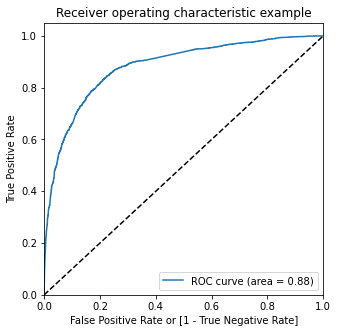

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding the optimum cut off point

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.025992,2178,0,1,0,0,0,0,0,0,0,0,0
1,1,0.843496,2924,1,1,1,1,1,1,1,1,1,1,0
2,0,0.959940,9108,1,1,1,1,1,1,1,1,1,1,1
3,0,0.105483,7926,0,1,1,0,0,0,0,0,0,0,0
4,0,0.108140,7870,0,1,1,0,0,0,0,0,0,0,0


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.392309  1.000000  0.000000
0.1   0.1  0.561482  0.972332  0.296249
0.2   0.2  0.775934  0.888142  0.703496
0.3   0.3  0.799969  0.848617  0.768563
0.4   0.4  0.813615  0.784585  0.832355
0.5   0.5  0.813459  0.709486  0.880582
0.6   0.6  0.801675  0.610277  0.925236
0.7   0.7  0.784463  0.526877  0.950753
0.8   0.8  0.760118  0.439921  0.966828
0.9   0.9  0.716855  0.296443  0.988262


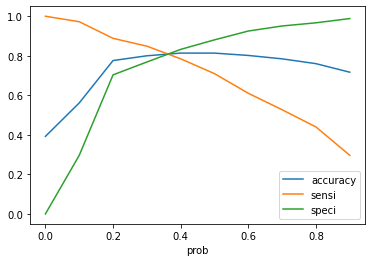

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curve, 0.38 is the optimum point to take it as a cutoff probability

In [156]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [157]:
y_train_pred_final.head()

,Converted,Conversion_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.025992,2178,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.843496,2924,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.959940,9108,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.105483,7926,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.108140,7870,0,1,1,0,0,0,0,0,0,0,0,0


In [158]:
# checking the overall accuracy score

print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted))

0.8109784462707397


In [159]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)
confusion2

array([[3217,  702],
       [ 517, 2013]])

In [160]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negative
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negative

In [161]:
# Sensitivity
TP/(FN+TP)

0.7956521739130434

In [162]:
# Specificity
TN/(TN+FP)

0.820872671599898

In [163]:
# Calculate false postive rate - predicting Converted when customer has not converted (1 - specificity)
print(FP/ float(TN+FP))

0.17912732840010206


In [164]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7414364640883978


In [165]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8615425816818425


## Precision and Recall

Going back to previous confusion matrix

In [166]:
# Precision 
# TP/TP+FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.793194874060981

In [167]:
# Recall
# TP/FN+TP
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7094861660079052

In [168]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [169]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.793194874060981

In [170]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7094861660079052

In [171]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

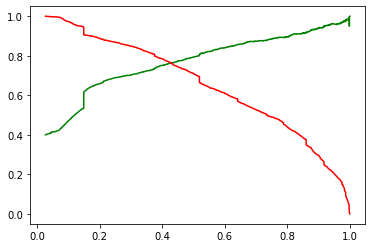

In [172]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 6 - Predictions on the test set

In [173]:
lead_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(lead_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [174]:
y_test = lead_test['Converted']

In [175]:
X_test = lead_test[col]

In [176]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Welingak Website,Country_Not given,Specialization_Not given,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2729,0,0.16,0.561620,0.266667,1,0,0,0,0,0,1,0,0,1,0,0
5463,0,0.16,0.630722,0.266667,0,0,0,0,0,1,0,1,0,0,0,0
6476,0,0.32,0.030370,0.178000,1,0,0,0,0,0,0,1,0,0,0,0
4135,0,0.20,0.116197,0.333333,1,0,0,0,0,0,0,0,0,0,0,0
5408,0,0.00,0.000000,0.000000,0,0,0,0,1,1,0,1,0,1,0,0


In [177]:
y_test.head()

2729    1
5463    0
6476    0
4135    1
5408    1
Name: Converted, dtype: int64

In [178]:
X_test_sm = sm.add_constant(X_test)

In [179]:
y_test_pred = lr_model_5.predict(X_test_sm)

In [180]:
y_test_pred[:10]

2729    0.902542
5463    0.518180
6476    0.112203
4135    0.604071
5408    0.518650
2681    0.997777
2271    0.903528
2659    0.986428
3186    0.658747
8213    0.918649
dtype: float64

In [181]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [182]:
# Let's see the head
y_pred_1.head()

,0
2729,0.902542
5463,0.518180
6476,0.112203
4135,0.604071
5408,0.518650


In [183]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [184]:
y_test_df['ID'] = y_test_df.index

In [185]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [186]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [187]:
y_test_pred_final.head()

,Converted,ID,0
0,1,2729,0.902542
1,0,5463,0.518180
2,0,6476,0.112203
3,1,4135,0.604071
4,1,5408,0.518650


In [188]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [189]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['ID','Converted','Conversion_Prob'], axis=1)

In [190]:
y_test_pred_final.head()

,ID,Converted,Conversion_Prob
0,2729,1,0.902542
1,5463,0,0.518180
2,6476,0,0.112203
3,4135,1,0.604071
4,5408,1,0.518650


In [191]:
y_test_pred_final['Final_predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [192]:
y_test_pred_final.head()

,ID,Converted,Conversion_Prob,Final_predicted
0,2729,1,0.902542,1
1,5463,0,0.518180,1
2,6476,0,0.112203,0
3,4135,1,0.604071,1
4,5408,1,0.518650,1


In [193]:
# Let's check the overall accuracy.
accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_predicted)

0.8061482820976492

In [194]:
confusion3 = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_predicted)

In [195]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [196]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.76171875

In [197]:
# Let us calculate specificity
TN / float(TN+FP)

0.8322802986789202

In [198]:
# False positive rate
FP/float(FP+TN)

0.16771970132107983

In [199]:
precision_score(y_test_pred_final.Converted, y_test_pred_final.Final_predicted)

0.7276119402985075

In [200]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.Final_predicted) # sensitivity

0.76171875